Logistic Regression with Python

 Working with the Titanic Data Set from Kaggle.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

In [5]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

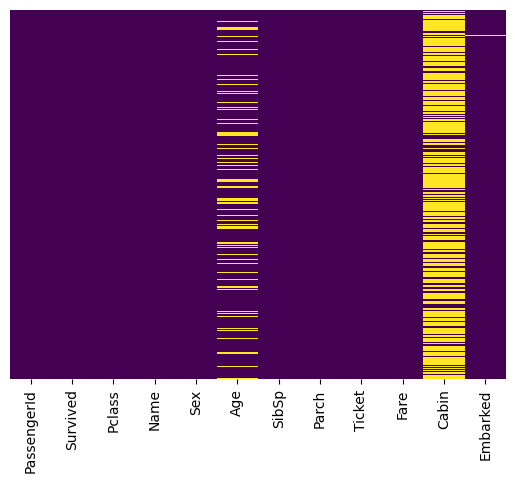

In [6]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

<Axes: xlabel='Survived', ylabel='count'>

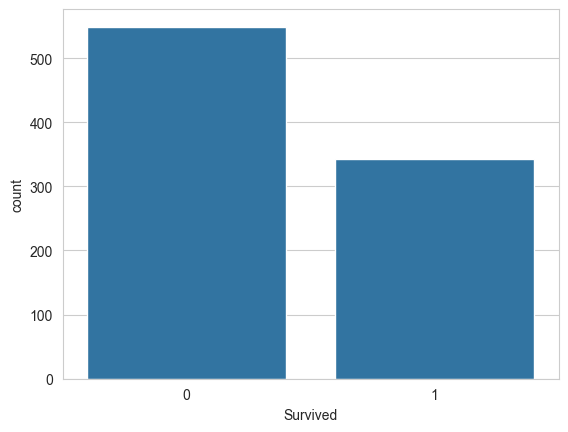

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

<Axes: xlabel='Survived', ylabel='count'>

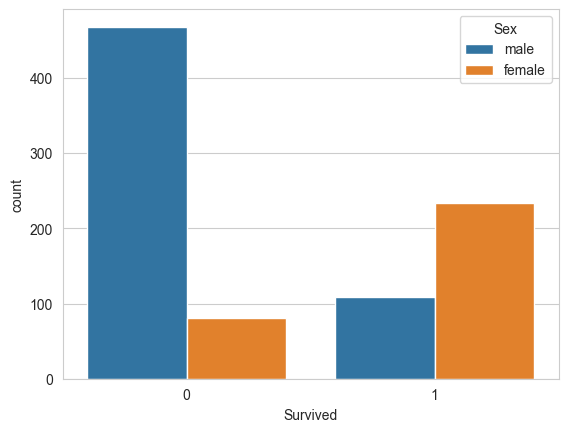

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue = 'Sex', data=train)

<Axes: xlabel='Survived', ylabel='count'>

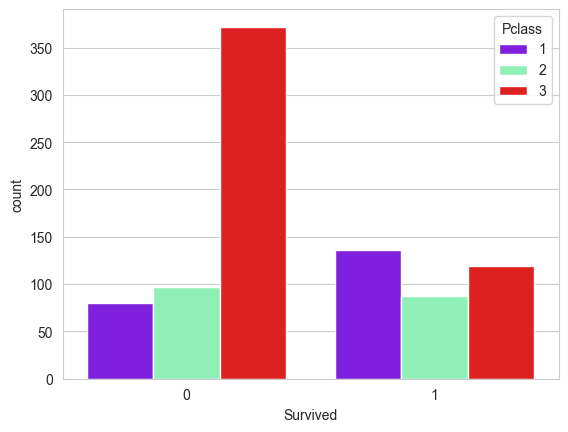

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue = 'Pclass', data=train, palette = 'rainbow')

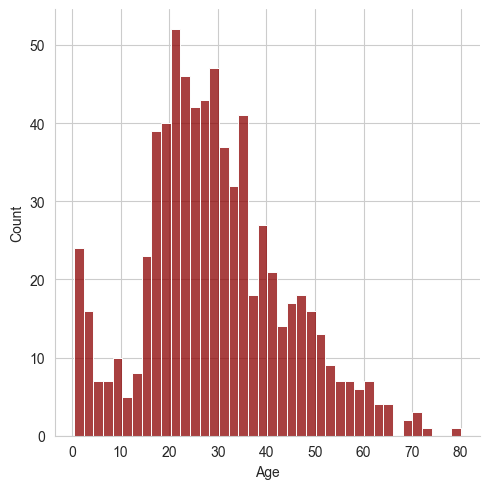

In [11]:
sns.displot(train['Age'].dropna(),kde = False, color = 'darkred', bins = 40)

<Axes: >

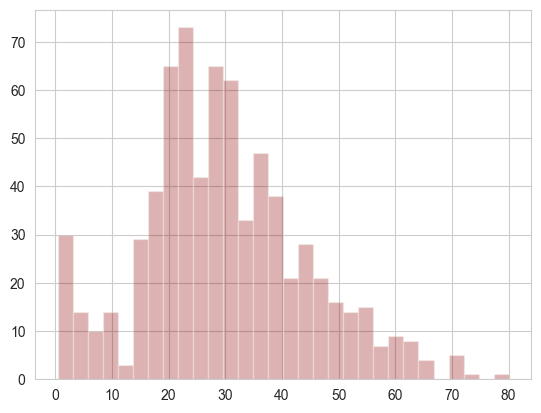

In [12]:
train['Age'].hist(bins = 30, color = 'darkred', alpha = 0.3)

<Axes: xlabel='SibSp', ylabel='count'>

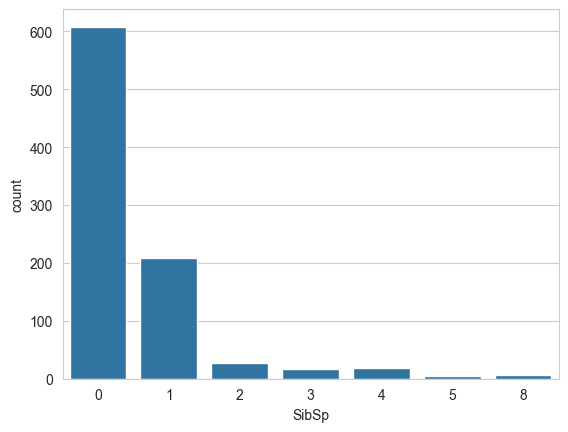

In [13]:
sns.countplot(x = 'SibSp', data = train)

<Axes: >

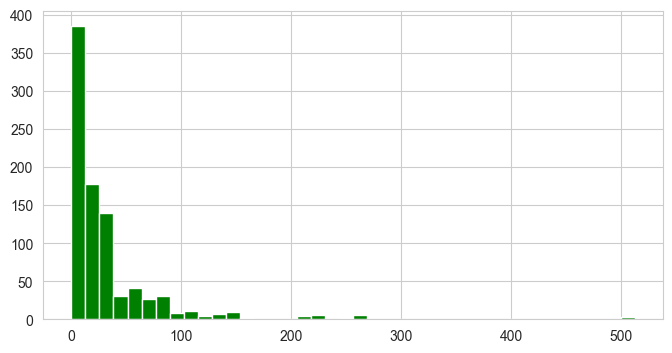

In [14]:
train['Fare'].hist(color = 'green',bins = 40, figsize = (8,4))

Cufflinks for plots

In [17]:
import cufflinks as cf

In [16]:
!pip install cufflinks

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   -------------------------- ------------- 1.6/2.3 MB 8.4 MB/s eta 0:00:01
   ----------------------------------- ---- 2.1/2.3 MB 6.9 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 5.1 MB/s eta 0:00:00
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68490 sha256=30490bd49074c92620db1415f042e8b17b24408bc3e9d1028b1810d6ec0ce27b
  Stored in directory: c:\users\tango\appdata\local\pip\cache\wheels\c0\d9\70\372130dacf508192607c1a7359c7bf0656b1a3b79f6cf66f7a
Successfully built cufflinks



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
cf.go_offline()

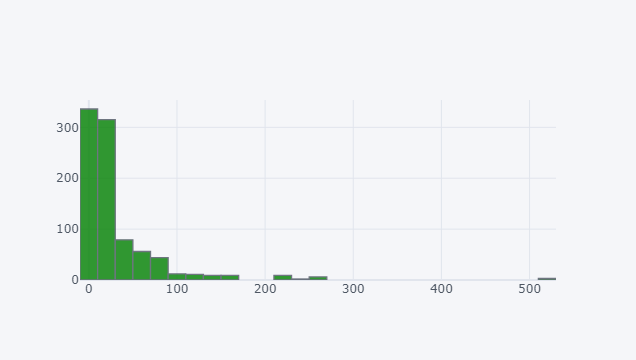

In [19]:
train['Fare'].iplot(kind = 'hist', bins = 30, color = 'green')

Data Cleaning

We want to fill in missing age data instead of just dropping the missing age data rows.

<Axes: ylabel='Age'>

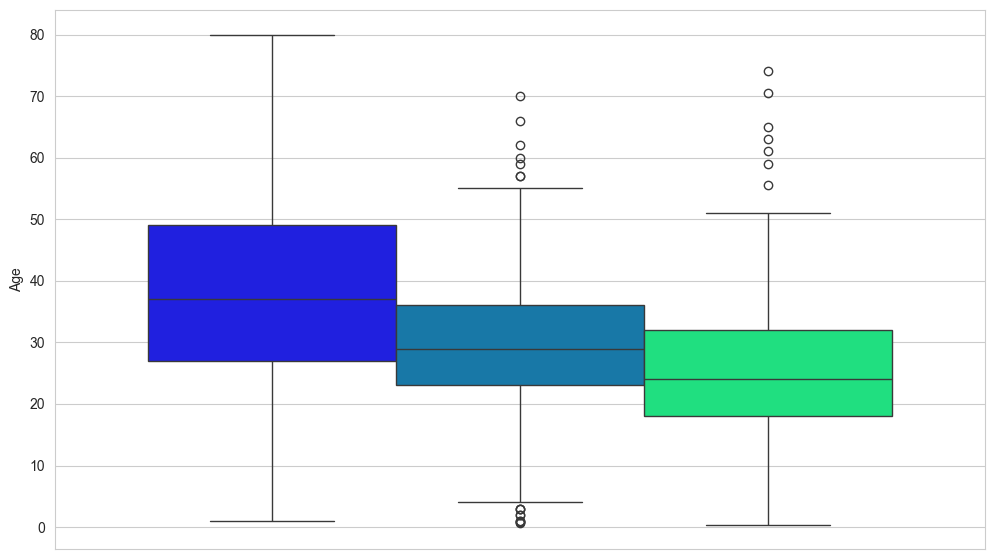

In [22]:
plt.figure(figsize = (12,7))
sns.boxplot(hue = 'Pclass', y = 'Age', data = train, palette = 'winter', legend = False)

In [30]:
def impute_age(row):
    Age = row['Age']
    Pclass = row['Pclass']

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [31]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

<Axes: >

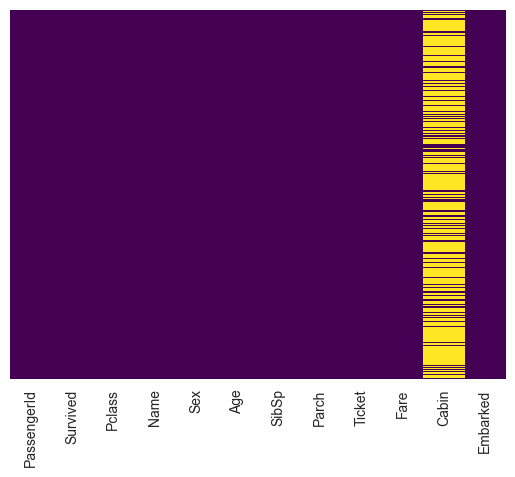

In [32]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

 drop the Cabin column and the row in Embarked that is NaN

In [33]:
train.drop('Cabin', axis = 1, inplace = True)
train.head(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,3,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,4,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,5,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,6,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,7,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,8,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,9,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,10,1,0,237736,30.0708,C


In [34]:
train.dropna(inplace = True)

convert categorical features to dummy variables using pandas

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    int64  
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 83.3+ KB


In [36]:
pd.get_dummies(train['Embarked'], drop_first = True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [37]:
sex = pd.get_dummies(train['Sex'], drop_first = True)
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [38]:
train.drop(['Sex','Embarked','Name','Ticket'],axis = 1, inplace = True)
train.head(6)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,1,1,0,7.2500
1,2,1,1,2,1,0,71.2833
2,3,1,3,3,0,0,7.9250
3,4,1,1,4,1,0,53.1000
4,5,0,3,5,0,0,8.0500
5,6,0,3,6,0,0,8.4583


In [40]:
train = pd.concat([train,sex,embark], axis = 1)
train.head(6)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,0,3,1,1,0,7.2500,True,False,True,True,False,True
1,2,1,1,2,1,0,71.2833,False,False,False,False,False,False
2,3,1,3,3,0,0,7.9250,False,False,True,False,False,True
3,4,1,1,4,1,0,53.1000,False,False,True,False,False,True
4,5,0,3,5,0,0,8.0500,True,False,True,True,False,True
5,6,0,3,6,0,0,8.4583,True,True,False,True,True,False


Building a Logistic Regression model

Train Test Split

In [41]:
train.drop('Survived', axis = 1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,3,1,1,0,7.2500,True,False,True,True,False,True
1,2,1,2,1,0,71.2833,False,False,False,False,False,False
2,3,3,3,0,0,7.9250,False,False,True,False,False,True
3,4,1,4,1,0,53.1000,False,False,True,False,False,True
4,5,3,5,0,0,8.0500,True,False,True,True,False,True


In [42]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [45]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/11.0 MB 7.6 MB/s eta 0:00:02
   ----------- ---------------------------- 3.1/11.0 MB 6.8 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/11.0 MB 6.1 MB/s eta 0:00:02
   ------------------- -------------------- 5.2/11.0 MB 6.1 MB/s eta 0:00:01
   ----------------------- ---------------- 6.6/11.0 MB 6.1 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.0 MB 6.0 MB/s eta 0:00:01
   --------------------------------- ------ 9.2/11.0 MB 5.9 MB/s eta 0:00:01
   -------------------------------------- - 10.5/11.0 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 5.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

Training and Predicting

In [49]:
from sklearn.linear_model import LogisticRegression

In [51]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\tango\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [52]:
prediction = logmodel.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix

In [55]:
accuracy = confusion_matrix(y_test, prediction)

In [56]:
accuracy

array([[151,  12],
       [ 36,  68]], dtype=int64)

In [57]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,prediction)
accuracy

0.8202247191011236

In [58]:
prediction

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0], dtype=int64)


Evaluation

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267

